In [231]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
import time
import matplotlib.image as mpimg

In [206]:
#Loading data
X = np.load('mnist_data.npy')
y = np.load('mnist_labels.npy')

# 1. Logistic Regression and kNN Classification 

## a)

In [47]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## b)

In [48]:
model_LR = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial')

In [49]:
# Fitting Logistic Regression Model
model_LR.fit(X_train, y_train)

/Users/kabiroberoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predictions on training and test set
predictions_LRtest = model_LR.predict(X_test)
predictions_LR_tr = model_LR.predict(X_train)

### Test Accuracy

In [52]:
accuracy_score(y_test,predictions_LRtest)

0.905952380952381

### Train Accuracy

In [53]:
accuracy_score(y_train,predictions_LR_tr)

0.960654761904762

## c)

In [54]:
# Fitting the kNN model for different values of k
test_acc = []
train_acc = []

for n in range(1,26,2):
    model_KNN = KNeighborsClassifier(n_neighbors= n)
    model_KNN.fit(X_train,y_train)
    predictions_KNN_test = model_KNN.predict(X_test)
    predictions_KNN_tr = model_KNN.predict(X_train)
    test_accuracy = accuracy_score(y_test, predictions_KNN_test)
    train_accuracy = accuracy_score(y_train, predictions_KNN_tr)
    test_acc.append(test_accuracy)
    train_acc.append(train_accuracy)
    

In [61]:
results_KNN = pd.DataFrame({'training_set':train_acc,'test_set':test_acc}, index= np.arange(1,27,2))
results_KNN.index.name = 'k'

### Accuracy on training and test set 

In [62]:
results_KNN

,training_set,test_set
k,,
1,1.000000,0.965714
3,0.982619,0.961429
5,0.974524,0.957143
7,0.969167,0.955714
9,0.965000,0.953095
11,0.961310,0.950476
13,0.958452,0.948333
15,0.956250,0.946905
17,0.953155,0.945238


## d)

### Explain your results

From the above table, it can be concluded that a value of k = 1 provides the highest accuracy for both - training and test set. The accuracy on the training set is 100%, which indicates that the model is fitting too well on the training set and is over-fitting. However, it also yields the best results on the test set in this case. If the test set was larger (> 20%), a value of k > 1 would be a good choice.

# 2. PCA - Dimensionality Reduction

## a)

In [208]:
# Standard Normalization of features
scaler = StandardScaler()

In [209]:
Xs = scaler.fit_transform(X)

In [ ]:
# Finding all principle components
model_PCA = PCA()

In [ ]:
principalComponents = model_PCA.fit_transform(Xs)

## b)

Text(0, 0.5, 'cumulative explained variance')

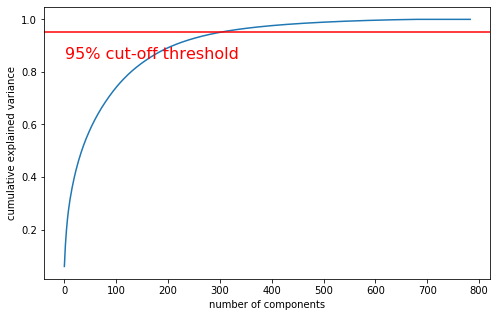

In [133]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(model_PCA.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

## c)

I chose the first 300 principal components because they seem to cover about 95% of the variance in the data. 

Below I am training the kNN algorithm with k = 1 on the principal components

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.20, random_state=42)

In [ ]:
model_KNN2 = KNeighborsClassifier(n_neighbors= 1)
model_KNN2.fit(X_train,y_train)
predictions_KNN_test2 = model_KNN2.predict(X_test)
predictions_KNN_tr2 = model_KNN2.predict(X_train)
test_accuracy2 = accuracy_score(y_test, predictions_KNN_test2)
train_accuracy2 = accuracy_score(y_train, predictions_KNN_tr2)


### Test Accuracy

In [59]:
test_accuracy2

0.9397619047619048

### Train Accuracy 

In [60]:
train_accuracy2

1.0

## d)

In [216]:
data_df = pd.DataFrame(Xs)
labels = pd.DataFrame(y, columns=['label'])
data_df = pd.concat([data_df,labels], axis = 1)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.025877,-0.016329,-0.010225,-0.009035,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.025877,-0.016329,-0.010225,-0.009035,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.025877,-0.016329,-0.010225,-0.009035,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.025877,-0.016329,-0.010225,-0.009035,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.025877,-0.016329,-0.010225,-0.009035,0.0,0.0,0.0,0.0,0.0,8


In [219]:
sample_size = 3000
run_time = []

while sample_size <= 21000:
    
    #randomly sample -  sample_size
    sample_df = data_df.sample(n = sample_size, random_state= 1)
    
    
    model_knn3 = KNeighborsClassifier(n_neighbors= 1)
    
    start_time = time.time()
    # Fitting the KNN model on the sample size
    model_knn3.fit(sample_df.iloc[:,:-1],sample_df['label'])
    end_time = time.time()
    
    rt = end_time-start_time
    run_time.append(rt)
    
    #incrementing sample size
    sample_size += 3000
        

In [227]:
knn_runtime_df = pd.DataFrame(np.arange(3000,21001,3000))
rtdf = pd.DataFrame(run_time)
knn_runtime_df = pd.concat([knn_runtime_df,rtdf], axis = 1)
knn_runtime_df.columns = ['Sample Size', 'Time(s)']
knn_runtime_df

,Sample Size,Time(s)
0,3000,0.107712
1,6000,0.258118
2,9000,0.488840
3,12000,0.754631
4,15000,1.124369
5,18000,1.487352
6,21000,1.931185


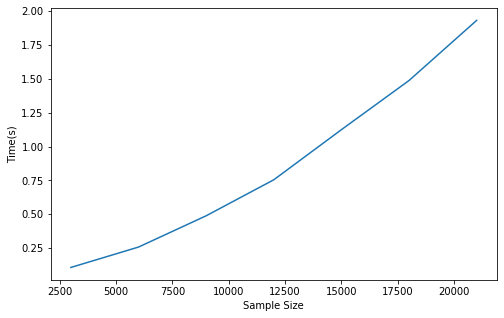

In [229]:
plt.figure(figsize=(8,5))
sns.lineplot(x= 'Sample Size', y= 'Time(s)', data = knn_runtime_df )

In [222]:
pca_dimensions = 50
run_time_pca = []

while pca_dimensions <= 750:
    
    
    model_knn4 = KNeighborsClassifier(n_neighbors= 1)
    
    start_time = time.time()
    # Fit the KNN model on the Principal Components
    model_knn4.fit(principalDf.iloc[:,:pca_dimensions], y)
    end_time = time.time()
    
    rt = end_time-start_time
    run_time_pca.append(rt)
    
    #incrementing number of Principal Components
    pca_dimensions += 100

In [226]:
knn_runtime_df_pca = pd.DataFrame(np.arange(50,751,100))
rt_pcadf = pd.DataFrame(run_time_pca)
knn_runtime_df_pca = pd.concat([knn_runtime_df_pca,rt_pcadf], axis = 1)
knn_runtime_df_pca.columns = ['Principal Components', 'Time(s)']
knn_runtime_df_pca

,Principal Components,Time(s)
0,50,0.048440
1,150,0.139025
2,250,0.222287
3,350,0.343673
4,450,0.526876
5,550,0.618469
6,650,0.757419
7,750,0.876381


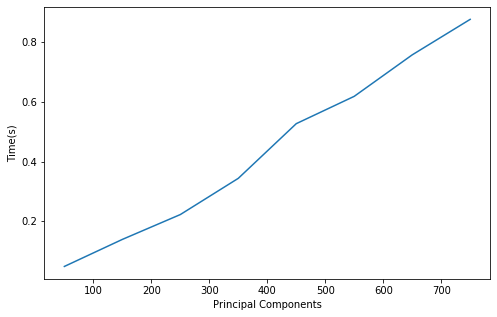

In [230]:
plt.figure(figsize=(8,5))
sns.lineplot(x= 'Principal Components', y= 'Time(s)', data = knn_runtime_df_pca, )

### Describe the plot. What seems to affect -as a trend- the fitting time more? Number of samples used for trying, or the dimensions of the data?

From the plot above, it can be concluded that:
- The the runtime increases with the increase in sample size and principal components
- The sample size affects the runtime more than the principal components